In [1]:
import pandas as pd

In [2]:
locations_df = pd.read_csv('../Data/Seleccion/locations.csv', index_col = 0)

In [3]:
# Observamos si hay valores nulos y en que atributos los hay
locations_df.isnull().any()

EPISODE_ID    False
EVENT_ID      False
RANGE          True
LATITUDE       True
LONGITUDE      True
LAT2           True
LON2           True
dtype: bool

In [4]:
#Cambiamos nombres a las columnas de LATITUD y LONGITUD a LAT1 y LON1
locations_df['LAT1'] = locations_df['LATITUDE']
locations_df['LON1'] = locations_df['LONGITUDE']
locations_df = locations_df.drop(['LATITUDE', 'LONGITUDE'], 1)

In [5]:
# Ponemos como valor por defecto en RANGE un radio de 0
locations_df['RANGE'] = locations_df['RANGE'].fillna(0)

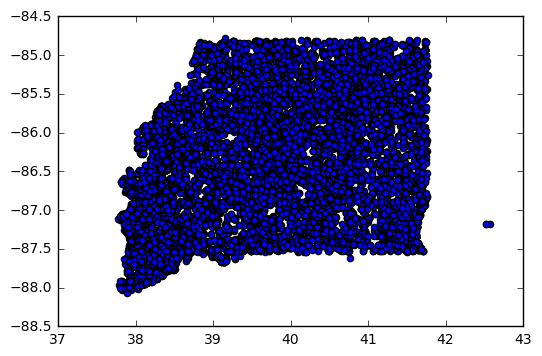

In [6]:
#Pintamos las localizaciones para observar si hay valores incorrectos, que esten fuera del estado de Indiana
import matplotlib.pyplot as plt

plt.scatter(locations_df['LAT1'], locations_df['LON1'])
plt.show()

In [7]:
#Observamos valores nulos de iniciales
locations_df['LAT1'].isnull().sum()

2476

In [8]:
#Observamos valores nulos de iniciales
locations_df['LON1'].isnull().sum()

2476

In [26]:
#Observamos valores nulos de iniciales
locations_df['LAT2'].isnull().sum()

7700

In [27]:
#Observamos valores nulos de iniciales
locations_df['LON2'].isnull().sum()

7700

In [9]:
#Eliminamos aquellos puntos que tiene un valor LAT1 mayor que 42
locations_df = locations_df[locations_df['LAT1'] < 42]

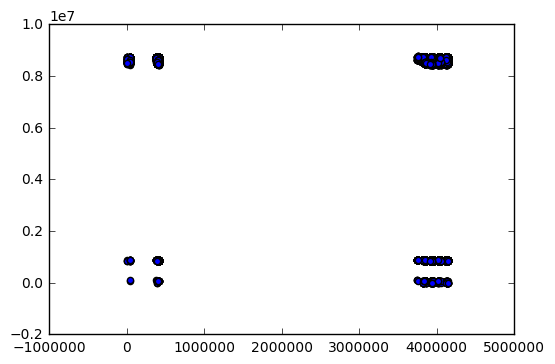

In [10]:
# Observamos que hay un error en muchos atributos de LAT2 Y LON2, analizamos un poco mas en profundidad
plt.scatter(locations_df['LAT2'], locations_df['LON2'])
plt.show()

In [11]:
# Observamos que muchos elementos no se han introducido correctamente y se procede a preprocesarlos
locations_df[['LAT2', 'LON2']]

,LAT2,LON2
1558,3756466.0,8723640.0
1559,3756292.0,8723718.0
1560,3755722.0,8722164.0
1561,3755902.0,8722176.0
1562,3756232.0,8722842.0
1563,3755338.0,8754012.0
1564,3754522.0,8755002.0
1565,3754726.0,8755200.0
1566,3755506.0,8754444.0
1567,3824264.0,8733684.0


In [13]:
def reajustar_puntos_lat(x):
    x_s = str(x).replace('.', '')
    x_s = x_s[:2] + '.' + x_s[2:]
    return float(x_s)

def reajustar_puntos_lon(x):
    x_s = str(x).replace('.', '')
    x_s = x_s[:2] + '.' + x_s[2:]
    if x_s[0] != '-':
        x_s = '-' + x_s
    return float(x_s)

In [14]:
locations_df['LAT2'] = locations_df['LAT2'].fillna(0.0)
locations_df['LAT2'] = locations_df['LAT2'].apply(reajustar_puntos_lat)
locations_df['LON2'] = locations_df['LON2'].fillna(0.0)
locations_df['LON2'] = locations_df['LON2'].apply(reajustar_puntos_lon)

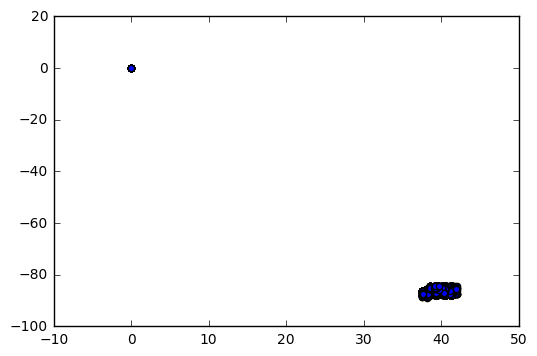

In [15]:
# Observamos que hay un error en muchos atributos de LAT2 Y LON2, analizamos un poco mas en profundidad
plt.scatter(locations_df['LAT2'], locations_df['LON2'])
plt.show()

In [16]:
#Eliminamos los outliers
locations_df = locations_df[locations_df['LAT2'] > 30]

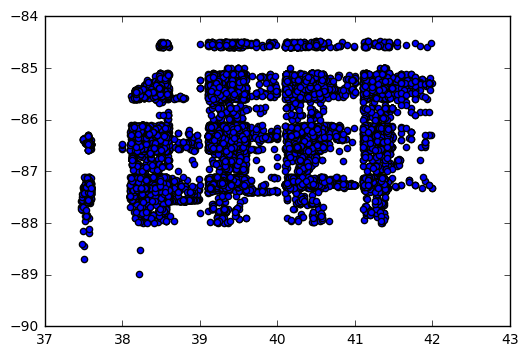

In [17]:
# Observamos que hay un error en muchos atributos de LAT2 Y LON2, analizamos un poco mas en profundidad
plt.scatter(locations_df['LAT2'], locations_df['LON2'])
plt.show()

In [36]:
#Se observa que los puntos de LAT2 y LON2 estan mal introducidos y no se puede hacer nada al respecto. Se
# intentara utilizar los puntos de posicion de la tabla de details

#Documentar que en el preprocesamiento de estos datos se observo que no era posible su uso debido a el excesivo ruido
# en las latitudes y longitudes del fin de cada tormenta, y que por ello se utilizaran las de details, aunque
# se pierda algo de informacion, sus posiciones presentan menos ruido.

#De estos datos tan solo se utilizara el valor range e LON1 y LAT1 porque es más completo que el de details

In [37]:
locations_df = locations_df[['EVENT_ID', 'EPISODE_ID', 'RANGE', 'LAT1', 'LON1']]
locations_df.to_csv('../Data/Preproceso/locations.csv')